In [76]:
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [78]:
# Load Dataset from your local path
base_path = r"C:\Users\Sani_\Downloads\New folder\cloud\sentiment labelled sentences"

file_names = [
    "amazon_cells_labelled.txt",
    "imdb_labelled.txt",
    "yelp_labelled.txt"
]

dataframes = []
for file in file_names:
    file_path = os.path.join(base_path, file)
    df = pd.read_csv(file_path, sep='\t', header=None, names=['sentence', 'label'])
    dataframes.append(df)

df = pd.concat(dataframes, ignore_index=True)

print("Dataset shape:", df.shape)
df.sample(5)


Dataset shape: (2748, 2)


,sentence,label
2372,Pretty awesome place.,1
442,They made this case too small and is very diff...,0
176,"I connected my wife's bluetooth,(Motorola HS85...",1
1073,I cannot believe that the actors agreed to do ...,0
960,I exchanged the sony ericson z500a for this an...,1


In [80]:
file_names = [
    "amazon_cells_labelled.txt",
    "imdb_labelled.txt",
    "yelp_labelled.txt"
]

dataframes = []
for file in file_names:
    file_path = os.path.join(base_path, file)
    df = pd.read_csv(file_path, sep='\t', header=None, names=['sentence', 'label'])
    dataframes.append(df)

df = pd.concat(dataframes, ignore_index=True)
df.sample(5)


,sentence,label
573,I am very happy,1
647,Great phone.,1
1281,"Of course, the acting is blah.",0
2584,Just had lunch here and had a great experience.,1
2406,It was just not a fun experience.,1


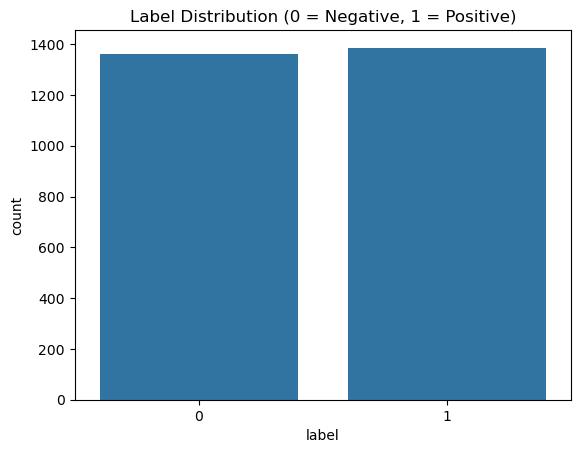

In [82]:
sns.countplot(data=df, x='label')
plt.title("Label Distribution (0 = Negative, 1 = Positive)")
plt.show()


In [84]:
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    return text

df['cleaned'] = df['sentence'].apply(clean_text)
df[['sentence', 'cleaned']].head()


,sentence,cleaned
0,So there is no way for me to plug it in here i...,so there is no way for me to plug it in here i...
1,"Good case, Excellent value.",good case excellent value
2,Great for the jawbone.,great for the jawbone
3,Tied to charger for conversations lasting more...,tied to charger for conversations lasting more...
4,The mic is great.,the mic is great


In [86]:
X_train, X_test, y_train, y_test = train_test_split(
    df['cleaned'], df['label'], test_size=0.2, random_state=42
)


In [88]:
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print("Vocabulary size:", len(vectorizer.vocabulary_))


Vocabulary size: 4741


In [90]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_vec.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

history = model.fit(
    X_train_vec.toarray(), y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Epoch 1/10


C:\Users\Sani_\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5574 - loss: 0.6864 - val_accuracy: 0.6523 - val_loss: 0.6432
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8441 - loss: 0.5320 - val_accuracy: 0.7455 - val_loss: 0.4980
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9392 - loss: 0.2396 - val_accuracy: 0.7977 - val_loss: 0.5337
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9559 - loss: 0.1326 - val_accuracy: 0.7773 - val_loss: 0.5259
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9885 - loss: 0.0599 - val_accuracy: 0.7841 - val_loss: 0.5610
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9952 - loss: 0.0364 - val_accuracy: 0.7795 - val_loss: 0.6028
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9941 - loss: 0.0267 - val_accuracy: 0.7773 - val_loss: 0.6693
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9973 - loss: 0.0149 - val_accuracy: 0.7818 - val_loss: 0.6998
Epo

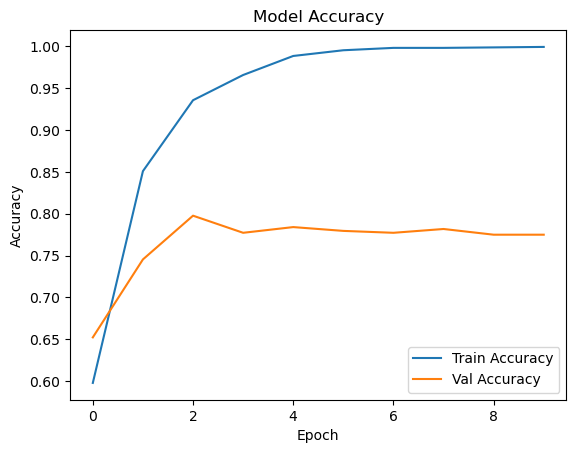

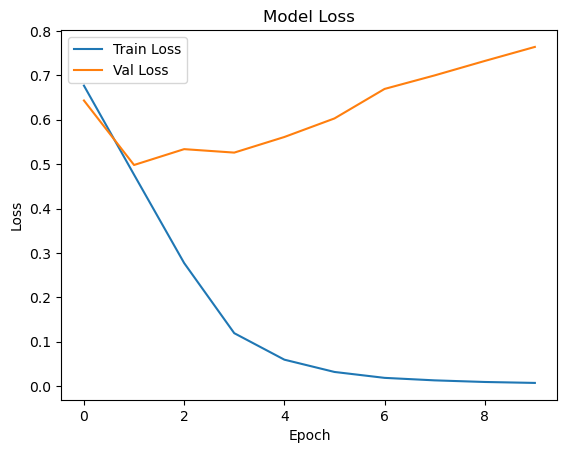

In [91]:
# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [92]:
test_loss, test_accuracy = model.evaluate(X_test_vec.toarray(), y_test)
print("Test Accuracy:", test_accuracy)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7982 - loss: 0.6382 
Test Accuracy: 0.7981818318367004


In [93]:
def predict_sentiment_nn(sentence):
    cleaned = clean_text(sentence)
    vector = vectorizer.transform([cleaned]).toarray()
    pred = model.predict(vector)[0][0]
    return "Positive 😊" if pred > 0.5 else "Negative 😠"

# Try a few:
print(predict_sentiment_nn("This phone is amazing!"))
print(predict_sentiment_nn("Worst experience ever."))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Positive 😊
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Negative 😠


In [98]:
joblib.dump(model,'sentimental_model.pkl')

['sentimental_model.pkl']